# MODEL SELECTION  
    
    
## Train test split -- Cross Validation -- GridSearchCV



- X train ,X test , Y test , X test =tain_test_split(X, y)

    - We devide our Data Set:
        - One to train the model(80%) - Train set (X train , Y train)
        - One to evaluat the model(20%) - Test set(X test , Y test)

    - We put those two tables:
        - model.fit(X train , Y train) to train our model.
        - model.score(X test , Y test) to evaluat our model.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris=load_iris()

x=iris.data
y=iris.target

names=list(iris.target_names)


from sklearn.model_selection import train_test_split


In [27]:
X_train ,X_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=5)


# Plot  : Train Set  / Test Set 


Text(0.5, 1.0, 'Test set')

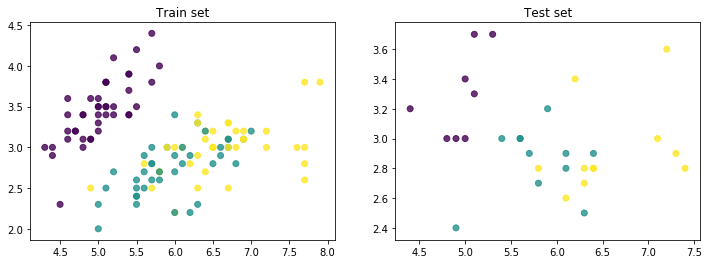

In [28]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,alpha=0.8)
plt.title('Train set')
plt.subplot(1,2,2)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,alpha=0.8)
plt.title('Test set')

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)

model.fit(X_train,y_train)

print('The test score is ',model.score(X_test,y_test))
print('The train score is ',model.score(X_train,y_train))

The test score is  0.9
The train score is  1.0


# Analyze the score depending of the n_neighbors parameter

The best score is  1.0 for k= 8


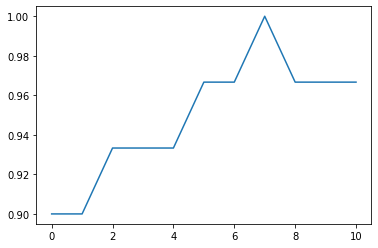

In [30]:
def best_value(n):
    score=[]
    i=0
    for j in range (1,n):
        model=KNeighborsClassifier(n_neighbors=j)
        model.fit(X_train,y_train)
        f=model.score(X_test,y_test)
        score.append(f)
        if f>i:
            i=f
            best_k=j
    print('The best score is ',i,'for k=',best_k)
    plt.plot(score)

best_value(12)

# why do we will split our data differently with a Validation Set ?

- The goal of prediction is to get the best model.

- Now we will have to :

    - 1) Fit the model with the train set.
    - 2) Score it with the test set.



- Let's say our score is not fully satisfying. 

    - We will have to train the model again and score it but the final evaluation will definitely not be accurate.
            
- Why ? 
    - Because our model know already our datas cause he is tunned with the train and test sets . 
    - The score will result to a 100% for the final evaluation. 
    - We shoul keep the test set for the very end , the final evaluation.

- That is why we will split your data differently with a Validation Set.
        
     - 1) We Train simultaneously our two differents (parameters tuned) model with the Train set .

     - 2)We score them with the validation set . 

     - 3)With the one having the best score we will evaluat him using the Test set to see his performance in real life.


- We work with the train set and the validation set until the end.
- At the very end, we will evaluate with the test set.



- Now, how can we be sure that our set is properly divided.
  - To be sure, you will divide it in different ways.

  

- Then we take the model with the best average . 

    - Model A average : 0,89
    - Model B average : 0,92
    
- The best split is Model B tunning. 

- To split this way and mean it we use the CROSS VALIDATION METHOD . 

- Typically to perform supervised learning, you need two types of data sets:

    - In one dataset (your "gold standard"), you have the input data together with correct/expected output; This dataset is usually duly prepared either by humans or by collecting some data in a semi-automated way. But you must have the expected output for every data row here because you need this for supervised learning.

    - The data you are going to apply your model to. In many cases, this is the data in which you are interested in the output of your model, and thus you don't have any "expected" output here yet.

- While performing machine learning, you do the following:

    - Training phase: 
      
       - you present your data from your "gold standard" and train your model, by pairing the input with the expected output.

    - Validation/Test phase: 
       
       - in order to estimate how well your model has been trained (that is dependent upon the size of your data, the value you would like to predict, input, etc) and to estimate model properties (mean error for numeric predictors, classification errors for classifiers, recall and precision for IR-models etc.)

    - Application phase: 
        
         - now, you apply your freshly-developed model to the real-world data and get the results. Since you usually don't have any reference value in this type of data (otherwise, why would you need your model?), you can only speculate about the quality of your model output using the results of your validation phase.

- The validation phase is often split into two parts:

    - In the first part, you just look at your models and select the best performing approach using the validation data (=validation)
    - Then you estimate the accuracy of the selected approach (=test).
Hence the separation to 50/25/25.

- In case if you don't need to choose an appropriate model from several rivaling approaches, you can just re-partition your set that you basically have only training set and test set, without performing the validation of your trained model. I personally partition them 70/30 then.

# Cross-validation

# Model A , k=1 : 

In [31]:
from sklearn.model_selection import cross_val_score

cross_val_score(KNeighborsClassifier(1),X_train,y_train,cv=5,scoring='accuracy')



array([1.        , 1.        , 0.95833333, 0.95833333, 0.95833333])

Mean it . 

In [32]:
cross_val_score(KNeighborsClassifier(1),X_train,y_train,cv=5,scoring='accuracy').mean()


0.975

# Model B , K=2 : 

In [33]:
cross_val_score(KNeighborsClassifier(2),X_train,y_train,cv=5,scoring='accuracy').mean()


0.9666666666666668

# Model C , k=3 : 

In [34]:
cross_val_score(KNeighborsClassifier(3),X_train,y_train,cv=5,scoring='accuracy').mean()


0.975

# Let's Graph the best cross validation model.

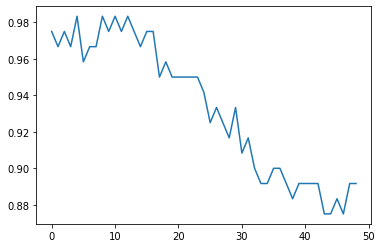

In [36]:
def Best_Knmodel(n):
    Train=[]
    for i in range (1,n):
        train=cross_val_score(KNeighborsClassifier(i),X_train,y_train,cv=5).mean()
        Train.append(train)

    
    plt.plot(Train)

Best_Knmodel(50)

# Validation curve is doing it for us   

In [372]:
from sklearn.model_selection import validation_curve


train_score , val_score = validation_curve(KNeighborsClassifier(), X_train,y_train,'n_neighbors',np.arange(1,50),cv=5)

val_score.shape

(49, 5)

In [373]:
val_score.mean(axis=1)

array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.98333333,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667,
       0.975     , 0.975     , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.94166667,
       0.925     , 0.93333333, 0.925     , 0.91666667, 0.93333333,
       0.90833333, 0.91666667, 0.9       , 0.89166667, 0.89166667,
       0.9       , 0.9       , 0.89166667, 0.88333333, 0.89166667,
       0.89166667, 0.89166667, 0.89166667, 0.875     , 0.875     ,
       0.88333333, 0.875     , 0.89166667, 0.89166667])

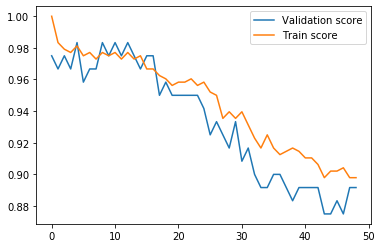

In [377]:
plt.plot(val_score.mean(axis=1),label='Validation score')
plt.plot(train_score.mean(axis=1),label='Train score')
plt.legend()

# Overfitting in Machine Learning
### Good performance on the training data, poor generliazation to other data.

- This is showing over fitting:
 
    - Over-fitting is when the model loses all its sense of generalization.
    - We see that the errors in the train are less than for the test.

- This means that we see a better score for the learning set than for the validation set.

- Overfitting refers to a model that models the training data too well.

- Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

- Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns.

- For example, decision trees are a nonparametric machine learning algorithm that is very flexible and is subject to overfitting training data. This problem can be addressed by pruning a tree after it has learned in order to remove some of the detail it has picked up.

# How To Limit Overfitting


- Both overfitting and underfitting can lead to poor model performance. But by far the most common problem in applied machine learning is overfitting.

- Overfitting is such a problem because the evaluation of machine learning algorithms on training data is different from the evaluation we actually care the most about, namely how well the algorithm performs on unseen data.

- There are two important techniques that you can use when evaluating machine learning algorithms to limit overfitting:

    - Use a resampling technique to estimate model accuracy.
    - Hold back a validation dataset.
- The most popular resampling technique is k-fold cross validation. 
- It allows you to train and test your model k-times on different subsets of training data and build up an estimate of the performance of a machine learning model on unseen data.

- A validation dataset is simply a subset of your training data that you hold back from your machine learning algorithms until the very end of your project. 
- After you have selected and tuned your machine learning algorithms on your training dataset you can evaluate the learned models on the validation dataset to get a final objective idea of how the models might perform on unseen data.

- Using cross validation is a gold standard in applied machine learning for estimating model accuracy on unseen data. If you have the data, using a validation dataset is also an excellent practice.

# Underfitting in Machine Learning
### Poor performance on the training data and poor generalization to other data.

- Underfitting in Machine Learning
- Underfitting refers to a model that can neither model the training data nor generalize to new data.

- An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

- Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms. Nevertheless, it does provide a good contrast to the problem of overfitting.

# Grid Search CV
### Grid-searching is the process of scanning the data to configure optimal parameters for a given model.


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}


model=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
model.best_score_

0.9833333333333334

In [40]:
model.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [41]:
Bestmodel=model.best_estimator_
Bestmodel.score(X_test,y_test)

0.9333333333333333

# Confusion Matrix to analize the overall accuracy (Result)


- A confusion matrix is a table that describes the performance of a classifier/classification model. It contains information about the actual and prediction classifications done by the classifier and this information is used to evaluate the performance of the classifier.

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Bestmodel.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

# Learning Curve 

- Is our model capable of better performance with more data ?
- Analyze all performances depending of the amount of datas .

In [43]:
from sklearn.model_selection import learning_curve

- We are going to cut the train set in percentage. 
    - Using :
        - np.linspace(0.1,1.0,10)
        - Starting at 10% until 100% cutting in 10 equal parts.
        - N giving us the number of datas in each parts.

In [44]:
N,train_score,val_score=learning_curve(Bestmodel,X_train,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=5)
print(N)
print (val_score.mean(axis=1))
print(train_score.mean(axis=1))


[ 9 19 28 38 48 57 67 76 86 96]
[0.68333333 0.95833333 0.98333333 0.98333333 0.975      0.98333333
 0.975      0.975      0.98333333 0.98333333]
[0.91111111 0.98947368 1.         1.         0.99583333 0.99649123
 0.98507463 0.98684211 0.97674419 0.98125   ]


In [45]:
np.linspace(0.1,1.0,10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

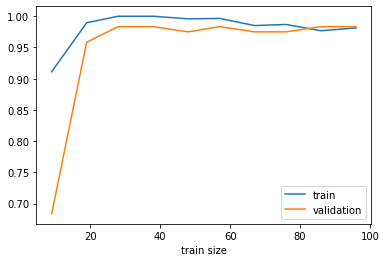

In [46]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train size')
plt.legend()


#### The model starts to give the same performance result after 80%. 
#### No more data are needed after 80% of the dataset. (No need for more than 76 datas)

# /Other methods of splitting our data set/
#### Cross Validation 

# KFold
### Mix the Dataset, then cut it into K equal parts (K-Fold). 

- For example if the Dataset contains 100 samples and K = 5, then we will have 5 packets of 20 samples. 

- We train on 4 packages, then evaluates on the remaining package. We proceed like this for all possible combinaison. 

At the end, K number of training sessions have been performed (5 training sessions in this situation).

- This technique is WIDELY USED, but it has a slight disadvantage: if the dataset is heterogeneous and includes unbalanced classes, then it may be that some Cross-Validation splits do not contain minority classes. 
- For exemple, if a dataset of 100 samples contains only 10 samples of class 0, and 90 samples of class 1, then it's possible that out of 5 Folds, some do not contain a sample of Class 0.

- Split our Train set with  cv=N
- Alternativly we will train for N-1 and test in the last one.
- We proceed N times.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris=load_iris()

x=iris.data
y=iris.target

names=list(iris.target_names)


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,LeaveOneOut,ShuffleSplit,StratifiedKFold

In [48]:
cv=KFold(5,random_state=0)
cross_val_score(KNeighborsClassifier(),x,y,cv=cv)

C:\Users\Jordan Uzan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([1.        , 1.        , 0.83333333, 0.93333333, 0.8       ])

# LeaveOneOut

- This technique is a special case of K-Fold. 
- In fact, this is the case where K = "number of Dataset samples". 
    - For exemple, if a Dataset contains 100 samples, Then K = 100.
    The machine therefore trains on 99 samples and evaluates itself on the last. 
    It thus carries out 100 trainings (out of the 100 possible combinations) which can take considerable time on the machine.

#### This technique is NOT RECOMMENDED

In [425]:
cv=LeaveOneOut()
cross_val_score(KNeighborsClassifier(),x,y,cv=cv)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Shuffle split

- This technique consists of mixing and then cutting the data set into two parts: 
    - A Train part and a Test part.
    - Once the training and the evaluation are finished, we collect our data, remix them, then rethink the DataSet in the same proportions as before.
    - The action is thus repeated for as many iterations of cross validation as desired. 
    - We thus find the same data several times in the validation set via Iterations.

#### This technique is a GOOD ALTERNATIVE to K-FOLD, but it has the same disadvantage: if the classes are unbalanced, then we risk missing information in the validation set !
    
    


In [51]:

cv=ShuffleSplit(4,test_size=0.2)
cross_val_score(KNeighborsClassifier(),x,y,cv=cv)


array([0.96666667, 0.96666667, 0.93333333, 0.93333333])

# Difference in KFold and ShuffleSplit output

- KFold will divide your data set into prespecified number of folds, and every sample must be in one and only one fold. A fold is a subset of your dataset.

- ShuffleSplit will randomly sample your entire dataset during each iteration to generate a training set and a test set. The test_size and train_size parameters control how large the test and training test set should be for each iteration. Since you are sampling from the entire dataset during each iteration, values selected during one iteration, could be selected again during another iteration.

- Summary: 
    - ShuffleSplit works iteratively, KFold just divides the dataset into k folds.

# Difference when doing validation

In KFold, during each round you will use one fold as the test set and all the remaining folds as your training set. However, in ShuffleSplit, during each round n you should only use the training and test set from iteration n. As your data set grows, cross validation time increases, making shufflesplits a more attractive alternate. If you can train your algorithm, with a certain percentage of your data as opposed to using all k-1 folds, ShuffleSplit is an attractive option.

# STRATIFIED K-FOLD

- This technique consumes more resources than the K-FOLD . 
- It consists of mixing the data set, then letting the machine sort the data in "Strata" (that is to say in different classes) before forming a number K of packets (K-Fold) which all contain a bit of data from each Strata (from each Class).


In [52]:
#4splits
cv=StratifiedKFold(4)
cross_val_score(KNeighborsClassifier(),x,y,cv=cv)


array([0.97368421, 0.94736842, 0.94594595, 1.        ])

# GROUP K-FOLD

- Folds are made by preserving the percentage of samples for each class.
- The same group will not appear in two different folds

- This Cross-Validation technique is VERY IMPORTANT TO KNOW!
- In Data Science, we often assume that our data is independent and drawn from the same distribution. 

    - For example, all apartments of a Real Estate DataSet are all independent (from each other) and identically distributed.(iid)

- But it's not always the case .

    - For example, the data from a medical Dataset may depend on each other: if people from the same family are diagnosed with cancer, then the genetic factor creates a dependence between the different data. It is therefore necessary to Cut the Dataset into an Influence Group, this is why there is GROUP K-FOLD.
GroupKfold (5) .split (X, y, groups)

- 1 Create groups that have a common value.
- 2 Define the number of equal split per group.
- 3 Take a packet of each split (1/4) which becomes our Validation set.
- 4 The rest becomes our Train Set.
- 5 Do the same thing n_splits times, taking another package from each to make all the configuratiosn possible.
- 6 Create a number of splits <= the number of groups!

For example, if you have 5 different groups of individuals, then you cannot have more than 5 splits: GroupKFold (n_splits = 5)
Then you have to use the split method:
    GroupKFold(n_splits=5).split(X, y, groups)

In [54]:
#Nbr of combination 
from sklearn.model_selection import GroupKFold
cv=GroupKFold(n_splits=5).split(x, y, groups=x[:,0])
cross_val_score(KNeighborsClassifier(),x,y,cv=cv)

array([0.93333333, 1.        , 0.96666667, 0.96666667, 1.        ])